<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>Data Sciences</center>
# <center>Network Data</center>
---

# <center>Tussanakorn Rattanaburee 62070505205</center>

### Import module

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [2]:
dol_edge = pd.read_csv('./dolphin_edges.csv')
dol_vertice = pd.read_csv('./dolphin_vertices.csv')

In [3]:
dol_edge.head()

,From,To
0,CCL,Double
1,DN16,Feather
2,DN21,Feather
3,Beak,Fish
4,Bumper,Fish


In [4]:
dol_vertice.head()

,Name,Gender
0,Beak,Male
1,Beescratch,Male
2,Bumper,Male
3,CCL,Female
4,Cross,Male


In [5]:
#Returns a graph from Pandas DataFrame containing an edge list.
G = nx.from_pandas_edgelist(dol_edge, source='From', target='To',create_using=nx.MultiDiGraph)

In [6]:
#Sets node attributes from data dolphin_vertices
nx.set_node_attributes(G, dol_vertice.set_index('Name').to_dict('index'))

In [7]:
G.nodes(data=True)

NodeDataView({'CCL': {'Gender': 'Female'}, 'Double': {'Gender': 'Female'}, 'DN16': {'Gender': 'Female'}, 'Feather': {'Gender': 'Male'}, 'DN21': {'Gender': 'Male'}, 'Beak': {'Gender': 'Male'}, 'Fish': {'Gender': 'Female'}, 'Bumper': {'Gender': 'Male'}, 'Gallatin': {'Gender': 'Male'}, 'Grin': {'Gender': 'Female'}, 'Haecksel': {'Gender': 'Male'}, 'Hook': {'Gender': 'Female'}, 'Beescratch': {'Gender': 'Male'}, 'Jet': {'Gender': 'Male'}, 'Jonah': {'Gender': 'Male'}, 'Knit': {'Gender': 'Male'}, 'DN63': {'Gender': 'Male'}, 'Kringel': {'Gender': 'Female'}, 'MN105': {'Gender': 'Male'}, 'MN23': {'Gender': 'Male'}, 'MN83': {'Gender': 'Male'}, 'Mus': {'Gender': 'Male'}, 'Notch': {'Gender': 'Male'}, 'Number1': {'Gender': 'Male'}, 'Oscar': {'Gender': 'Male'}, 'Patchback': {'Gender': 'Male'}, 'PL': {'Gender': 'Male'}, 'Quasi': {'Gender': 'Male'}, 'Ripplefluke': {'Gender': 'Unknown'}, 'Fork': {'Gender': 'Male'}, 'Scabs': {'Gender': 'Female'}, 'Shmuddel': {'Gender': 'Female'}, 'SMN5': {'Gender': 'Male'

In [8]:
#Test node attributes
G.nodes["CCL"]

{'Gender': 'Female'}

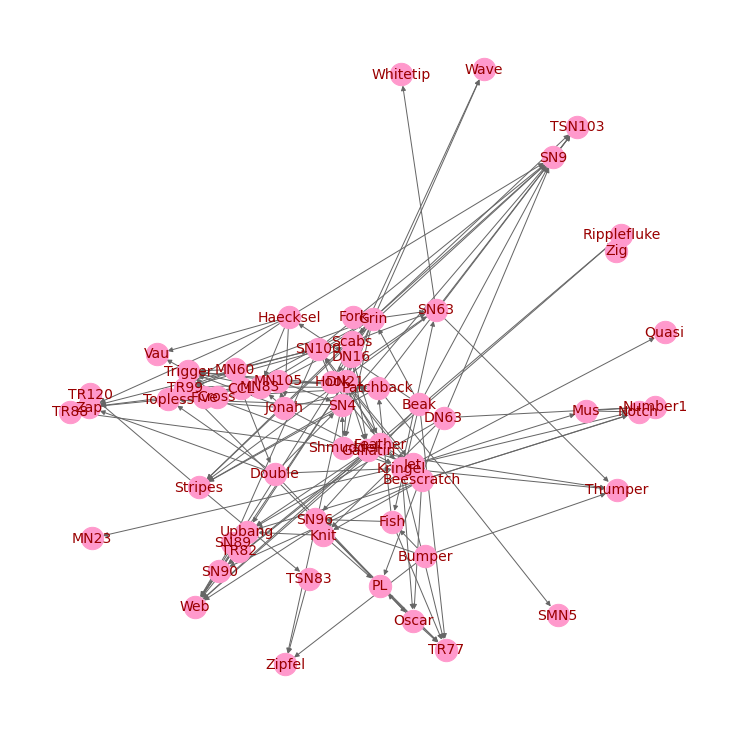

In [9]:
#Draw networks graph
plt.figure(3,figsize=(10,10)) 
nx.draw(G,with_labels=True, node_size=500, font_size=14, node_color='#FF99CC',edge_color ='#666666',font_color = '#990000')
plt.show()

In [10]:
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 62
Number of edges: 159
Average in degree:   2.5645
Average out degree:   2.5645


In [11]:
pd.DataFrame(G.degree, columns=['Node','Degree'])

,Node,Degree
0,CCL,3
1,Double,6
2,DN16,4
3,Feather,7
4,DN21,6
...,...,...
57,TR82,1
58,Whitetip,1
59,Zap,5
60,Zig,1


In [12]:
dol_in = pd.DataFrame(G.in_degree, columns=['Node','In-degree'])
dol_in

,Node,In-degree
0,CCL,0
1,Double,1
2,DN16,0
3,Feather,2
4,DN21,0
...,...,...
57,TR82,0
58,Whitetip,1
59,Zap,5
60,Zig,1


In [13]:
dol_out = pd.DataFrame(G.out_degree, columns=['Node','Out-degree'])
dol_out

,Node,Out-degree
0,CCL,3
1,Double,5
2,DN16,4
3,Feather,5
4,DN21,6
...,...,...
57,TR82,1
58,Whitetip,0
59,Zap,0
60,Zig,0


### 1. Who are the most popular?

In [14]:
dol_in.sort_values('In-degree',ascending=False).head()

,Node,In-degree
49,Trigger,9
56,Web,9
43,Topless,8
35,SN4,7
38,SN9,7


จากข้อมูล โหนดที่มีระดับ most popular คือ Node "Trigger" และ "Web" โดยมีค่า In-degree เท่ากับ 9

### 2. Pick 2 individuals, find the shortest path between them

In [15]:
dolphin_weight = dol_edge.copy()
dolphin_weight['Weight'] = 1
dolphin_weight

,From,To,Weight
0,CCL,Double,1
1,DN16,Feather,1
2,DN21,Feather,1
3,Beak,Fish,1
4,Bumper,Fish,1
...,...,...,...
154,Topless,Zap,1
155,Ripplefluke,Zig,1
156,Bumper,Zipfel,1
157,SN4,Zipfel,1


In [16]:
G_dolphin_weight = nx.from_pandas_edgelist(dolphin_weight,source='From', target='To',
                                           edge_attr='Weight',create_using=nx.MultiDiGraph)

In [17]:
print([p for p in nx.all_shortest_paths(G_dolphin_weight,'Beak','Trigger',weight='Weight')])

[['Beak', 'Fish', 'Patchback', 'Trigger'], ['Beak', 'Grin', 'MN83', 'Trigger'], ['Beak', 'Haecksel', 'MN83', 'Trigger'], ['Beak', 'Grin', 'TR99', 'Trigger'], ['Beak', 'SN96', 'TR99', 'Trigger'], ['Beak', 'Haecksel', 'Jonah', 'Trigger'], ['Beak', 'Haecksel', 'Topless', 'Trigger']]


In [18]:
nx.shortest_path(G_dolphin_weight,'Beak','Trigger',weight='Weight')

['Beak', 'Fish', 'Patchback', 'Trigger']

In [19]:
nx.shortest_path_length(G_dolphin_weight,'Beak','Trigger',weight='Weight')

3

จากข้อมูล 'Beak', 'Fish', 'Patchback', 'Trigger' นี่คือเส้นทางที่สั้นที่สุดระหว่าง Node Beak และ Node Trigger 
โดยเส้นทางที่สั้นที่สุดมีความยาวเท่ากับ 3 หน่วย

### 3. What does the shortest path mean?

จากข้อมูลกราฟชุดนี้แต่ละโหนดจะแสดงข้อมูลเกี่ยวกับ Dolphin Social Network ซึ่ง shortest path จะแสดงถึงระยะห่างของการเชื่อมต่อระหว่างกัน 
ยิ่งระยะห่างใกล้กันมากเท่าไหร่ ก็จะทำให้โหนด 2 โหนด สามารถที่จะโต้ตอบและค้นหากันบนอินเทอร์เน็ตได้ง่ายขึ้น

### 4. Find how many components are there in the network

In [20]:
G_dol_components = nx.from_pandas_edgelist(dol_edge, 'From', 'To',create_using=nx.Graph)

In [21]:
[x for x in nx.connected_components(G_dol_components)]

[{'Beak',
  'Beescratch',
  'Bumper',
  'CCL',
  'Cross',
  'DN16',
  'DN21',
  'DN63',
  'Double',
  'Feather',
  'Fish',
  'Five',
  'Fork',
  'Gallatin',
  'Grin',
  'Haecksel',
  'Hook',
  'Jet',
  'Jonah',
  'Knit',
  'Kringel',
  'MN105',
  'MN23',
  'MN60',
  'MN83',
  'Mus',
  'Notch',
  'Number1',
  'Oscar',
  'PL',
  'Patchback',
  'Quasi',
  'Ripplefluke',
  'SMN5',
  'SN100',
  'SN4',
  'SN63',
  'SN89',
  'SN9',
  'SN90',
  'SN96',
  'Scabs',
  'Shmuddel',
  'Stripes',
  'TR120',
  'TR77',
  'TR82',
  'TR88',
  'TR99',
  'TSN103',
  'TSN83',
  'Thumper',
  'Topless',
  'Trigger',
  'Upbang',
  'Vau',
  'Wave',
  'Web',
  'Whitetip',
  'Zap',
  'Zig',
  'Zipfel'}]

In [22]:
nx.number_connected_components(G_dol_components)

1

In [23]:
len([x for x in nx.connected_components(G_dol_components)])

1

จากข้อมูลสรุปได้ว่า มีเพียง 1 component ใน network